# 12 Working with Dates and Time Series Data

## 12.1 Datetime format

There are some built-in datetime method, e.g.,

* `.day_name()`

* `.to_datatime()`

But they are only worked when the column are in datatime format. If not, we need to tell the method what the format of our data is. `format='%Y-%m-%d %I-%p'`

Check up the format via this [link](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).


We could also tell what the date format (parse format string) is while importing the data.

`dates_df = pd.read_csv('dates.csv', delimiter=';', parse_dates=['Date'], date_parser=(lambda x: datetime.strptime(x, format='%Y-%m-%d %I-%p')))` which needs to import datatime package. See the code example below.

## 12.2 Datetime method

* To get the day_name for a single value: `df.loc[0,'Date'].day_name()`

* To get the day_name of a series: `df['Date'].dt.day_name()`

* To get the earliest datetime: `df['Date'].min()`

* To get the difference between two datetimes (Timedelta): `df['Date'].max() - df['Date'].min()`

In [1]:
import pandas as pd

dates_df = pd.read_csv('dates.csv', delimiter=';')

In [2]:
dates_df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [3]:
print(dates_df.shape)

(23674, 7)


In [4]:
dates_df.loc[0,'Date']

'2020-03-13 08-PM'

In [7]:
dates_df['Date'] = pd.to_datetime(dates_df['Date'], format='%Y-%m-%d %I-%p')

In [8]:
dates_df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [10]:
dates_df.loc[0, 'Date'].day_name()

'Friday'

In [21]:
dates_df['DayOfWeek'] = dates_df['Date'].dt.day_name()
dates_df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [16]:
from datetime import datetime

d_parser= lambda x: datetime.strptime(x,'%Y-%m-%d %I-%p')
dates_df = pd.read_csv('dates.csv', delimiter=';', parse_dates=['Date'], date_parser=d_parser)

In [17]:
dates_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


## 12.3 Working with datetime

* as a string

* slice the datatime to filter out the desired range: `dates_df['2020-01':'2020-03']`

In [23]:
filt = (dates_df['Date'] >= '2019') & (dates_df['Date'] < '2020')
dates_df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [26]:
type(dates_df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
filt = (dates_df['Date'] >= '2019-01-01') & (dates_df['Date'] < '2020-01-01')

# the same we add pd.to_datetime('2019-01-01')
dates_df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [31]:
dates_df1 = dates_df
dates_df1.set_index('Date', inplace=True)

In [33]:
dates_df1.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [35]:
#slice the datatime

dates_df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


This is how slicing is useful. E.g., calculating the average closing price.

In [37]:
#by hour
dates_df['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [39]:
# for one specific day
dates_df.loc['2020-01-01']['Close'].max()

132.55

### If we want to see the data on weekly, 2-days, or specific time interval basis: resample()

Useful for plotting

In [45]:
#Results are the same as above
highs = dates_df['Close'].resample('D').max()
highs['2020-01-01']

132.55

In [42]:
dates_df['High'].resample('D').max()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [46]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

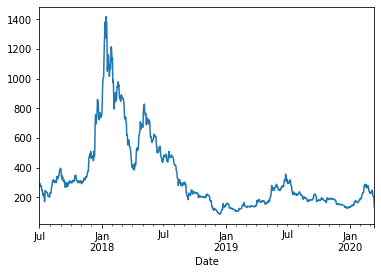

In [47]:
highs.plot()

### Resample on multiple columns

In [ ]:
# if I want mean for all
dates_df.resample('W').mean()

In [48]:
# if I want different statistics for different columns
dates_df.resample('W').agg({'Close':'mean','High':'max','Low':'median','Volume':'sum'}) #parse a dict

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,262.530,8.084631e+07
2017-07-09,261.062083,285.00,263.220,2.246746e+08
2017-07-16,195.698393,240.33,194.930,5.017750e+08
2017-07-23,212.783750,249.40,218.930,7.221637e+08
2017-07-30,203.309524,229.99,199.465,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,262.065,3.912867e+08
2020-02-23,265.321905,287.13,261.965,3.067838e+08
2020-03-01,236.373988,278.13,226.570,3.693920e+08
